In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

In [25]:
plt.style.use(['./thesis.mplstyle', "science", "grid", "muted"])
#plt.style.use(['./thesis.mplstyle'])

In [26]:
def landau_free_energy(phi, a, t, T_C, u):
    return -0.5 * a * T_C * (1 - t) * np.power(np.abs(phi), 2) + 0.25 * u * np.power(np.abs(phi), 4)

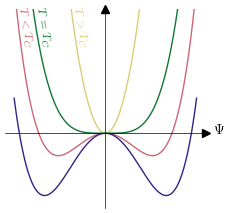

In [67]:
a = 1
T_C = 1
u = 1

phi = np.linspace(-1.5, 1.5, num=500)

fig, ax = plt.subplots(figsize=(2.59, 2.59))

t = 0.4
ax.plot(phi, landau_free_energy(phi, a, t, T_C, u))
ax.text(-1.45, 0.35, r'$T < T_C$', size="small", rotation=-80, color="C0")

t = 1e-6
ax.plot(phi, landau_free_energy(phi, a, t, T_C, u))

t = 4
ax.plot(phi, landau_free_energy(phi, a, t, T_C, u))
ax.text(-0.55, 0.35, '$T > T_C$', size="small", rotation=-80, color="C2")

t = 1
ax.plot(phi, landau_free_energy(phi, a, t, T_C, u))
ax.text(-1.15, 0.35, '$T = T_C$', size="small", rotation=-80, color="C3")

# Move the left and bottom spines to x = 0 and y = 0, respectively.
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
# Hide the top and right spines.
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])

ax.set_ylim(top=0.5, bottom=-0.3)

ax.set_xlabel(r"$\Psi$")
ax.xaxis.set_label_coords(1.07, 0.42)

fig.savefig("landau_free_energy.pgf")

In [28]:
def ginzburg_landau_free_energy(phi_re, phi_im, a, t, T_C, u):
    return -0.5 * a * T_C * (1 - t) * np.power(np.abs(phi_re + 1j * phi_im), 2) + 0.25 * u * np.power(np.abs(phi_re + 1j * phi_im), 4)

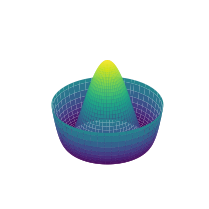

In [29]:
from matplotlib import cm

a = 1
T_C = 1
u = 1

r = np.linspace(0, 1.3, 100)
theta = np.linspace(0, 2*np.pi, 100)
r, theta = np.meshgrid(r, theta)

phi_RE = r * np.sin(theta)
phi_IM = r * np.cos(theta)

fig, ax = plt.subplots(figsize=(2.59, 2.59), subplot_kw={"projection": "3d"})

t = 1e-6
Z = ginzburg_landau_free_energy(phi_RE, phi_IM, a, t, T_C, u)
surf = ax.plot_surface(phi_RE, phi_IM, Z, cmap=cm.viridis, linewidth=0, antialiased=True)

# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.axis("off")

#ax.spines["left"].set_position(("data", 0))
#ax.spines["bottom"].set_position(("data", 0))

#ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)

fig.savefig("ginzburg_landau_free_energy.pgf")